<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

# 📓 Regresión Lineal: De la Teoría a la Práctica

Este notebook es una guía completa para entender la regresión lineal desde sus fundamentos. Empezaremos con el análisis de la relación entre variables, construiremos modelos simples y los haremos progresivamente más complejos, evaluando siempre su rendimiento y validando sus supuestos teóricos.

**Dataset Propuesto: `Advertising.csv`**
Usaremos un dataset clásico sobre publicidad. Contiene el presupuesto de publicidad en TV, Radio y Periódico, y las ventas resultantes. Es ideal porque es fácil de entender y permite ilustrar todos los conceptos de regresión.

  * **TV**: Gasto en publicidad por TV (en miles de USD).
  * **Radio**: Gasto en publicidad por Radio (en miles de USD).
  * **Newspaper**: Gasto en publicidad por Periódico (en miles de USD).
  * **Sales**: Ventas de un producto (en miles de unidades).

**Nuestra meta:** Predecir `Sales` basándonos en el gasto en publicidad.

-----

### **Paso 0: Configuración Inicial**

Primero, importemos las librerías que usaremos y carguemos nuestros datos.


In [1]:
# Librerías para manipulación y análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Scikit-Learn para modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Configuración para que los gráficos se muestren en el notebook
%matplotlib inline

In [2]:
# Cargar el dataset desde una URL
archivo = 'Advertising.csv'
data = pd.read_csv(archivo, index_col=0)

# Echemos un primer vistazo
print("Primeras 5 filas del dataset:")
display(data.head())

print("\nInformación general y tipos de datos:")
data.info()

print("\nEstadísticas descriptivas:")
display(data.describe())

Primeras 5 filas del dataset:


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



Información general y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB

Estadísticas descriptivas:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## 1\. Dependencia de Variables (Análisis Exploratorio) 📊

Antes de construir cualquier modelo, debemos entender nuestros datos. ¿Existe alguna relación entre el gasto en publicidad y las ventas? La visualización es clave.

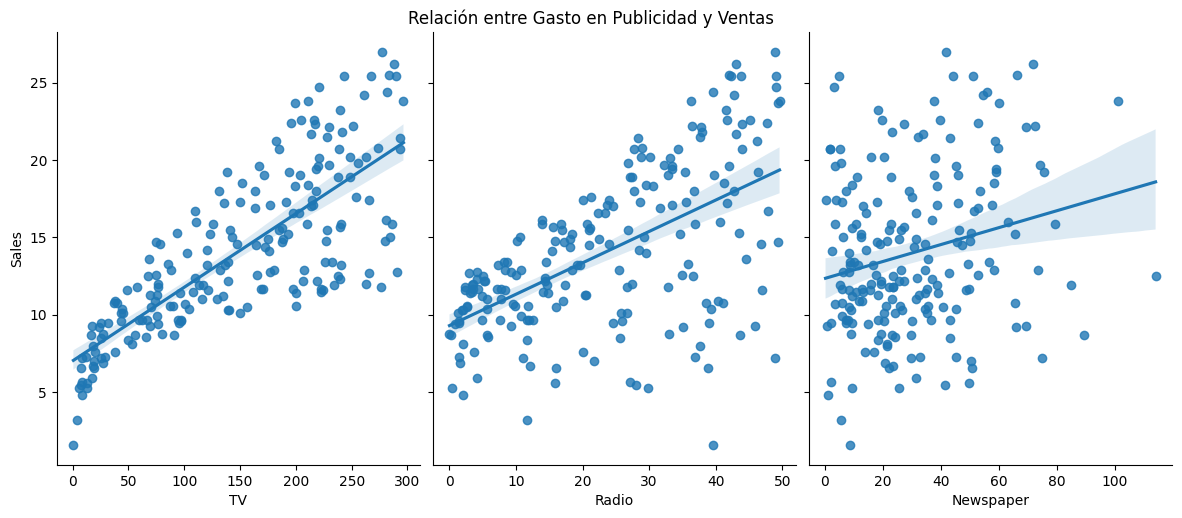

In [3]:
# Usamos pairplot de seaborn para visualizar las relaciones entre todas las variables
# y la distribución de cada una.
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8, kind='reg')
plt.suptitle('Relación entre Gasto en Publicidad y Ventas', y=1.02)
plt.show()

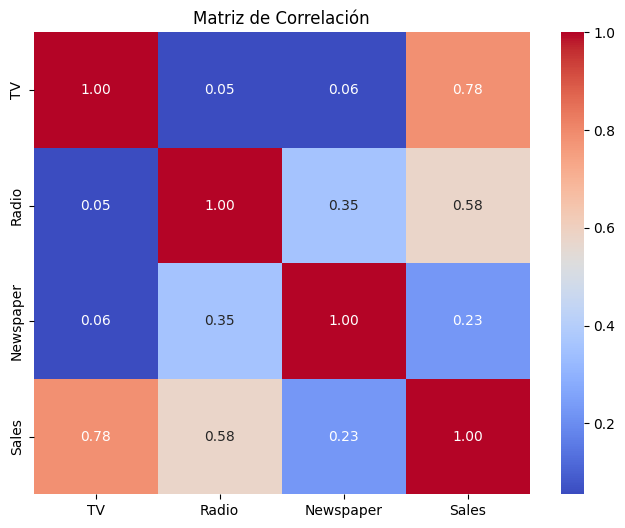

In [4]:
# También podemos cuantificar esta relación usando una matriz de correlación.
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


### 🤔 **Preguntas para Discusión:**

1.  Observando los gráficos y la matriz de correlación, ¿qué variable predictora (`TV`, `Radio`, `Newspaper`) parece tener la relación más fuerte y lineal con las `Sales`?
2.  La relación entre `Newspaper` y `Sales` parece más débil y dispersa. ¿Qué nos dice esto sobre su posible utilidad como predictor?
3.  ¿Existen correlaciones notables entre las propias variables predictoras (ej. entre `Radio` y `Newspaper`)? ¿Por qué esto podría ser importante más adelante?

-----

respuestas aqui

## 2\. Supuestos Teóricos del Modelo de Regresión Lineal 📝

Un modelo de regresión lineal (conocido como OLS - *Ordinary Least Squares*) es confiable solo si se cumplen ciertos supuestos sobre los datos y los errores del modelo (residuos). Los más importantes son (acrónimo **L.I.N.E.**):

1.  **Linealidad (L):** La relación entre las variables predictoras y la variable objetivo debe ser lineal. (Ya lo exploramos visualmente en el paso 1).
2.  **Independencia (I):** Los residuos (los errores de predicción) deben ser independientes entre sí. Es decir, el error de una observación no debe influir en el error de otra.
3.  **Normalidad (N):** Los residuos deben seguir una distribución normal. Esto es importante para las pruebas de hipótesis sobre los coeficientes.
4.  **Homocedasticidad (E - Equal Variance):** La varianza de los residuos debe ser constante a lo largo de todos los niveles de las variables predictoras. En otras palabras, la dispersión de los errores debe ser la misma para valores pequeños y grandes de los predictores.

No podemos verificar todos estos supuestos aún, pero los tendremos en mente y **volveremos a ellos** después de construir nuestro primer modelo.

### 🤔 **Preguntas para Discusión:**

1.  ¿Qué podría pasar si la relación no es lineal y aun así ajustamos un modelo lineal? ¿Cómo se vería el gráfico de residuos?
2.  Piensa en un ejemplo donde los residuos NO serían independientes (ej. datos de series de tiempo como el precio de una acción día a día).

-----

respuestas aqui

## 3\. Regresión Lineal Simple 📈

Comencemos con el caso más sencillo: predecir las ventas usando **solo una** variable predictora. Basándonos en nuestro análisis, `TV` es el mejor candidato.

**Modelo a estimar:** $Sales = \theta_0 + \theta_1 \times TV$

In [5]:
# 1. Definir nuestras variables X e y
X = data[['TV']]
y = data['Sales']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# Esto es CRUCIAL para evaluar si nuestro modelo generaliza bien a datos nuevos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Crear y entrenar el modelo
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# 4. Ver los parámetros estimados
print(f"Ordenada al origen (θ₀): {model_simple.intercept_:.4f}")
print(f"Coeficiente para TV (θ₁): {model_simple.coef_[0]:.4f}")

Ordenada al origen (θ₀): 7.2395
Coeficiente para TV (θ₁): 0.0464



**Visualicemos el modelo ajustado:**


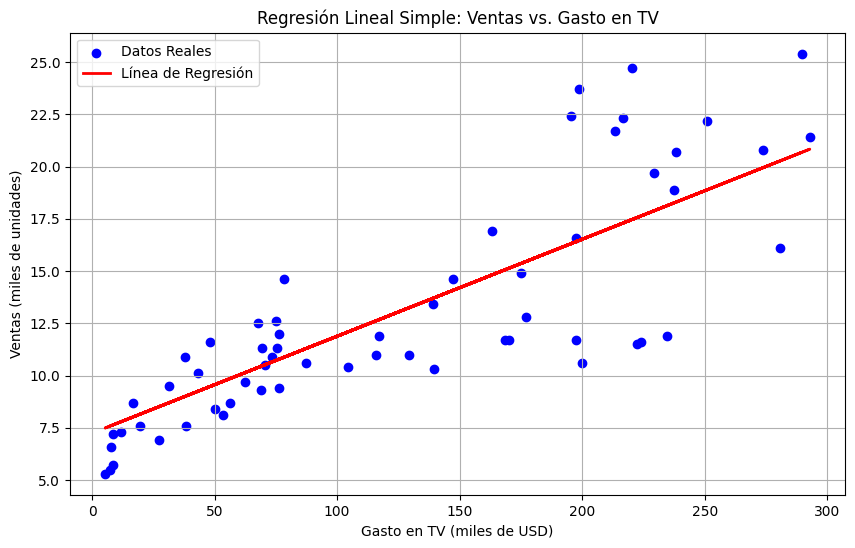

In [6]:
# 5. Visualizar la línea de regresión sobre los datos de prueba
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, model_simple.predict(X_test), color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal Simple: Ventas vs. Gasto en TV')
plt.xlabel('Gasto en TV (miles de USD)')
plt.ylabel('Ventas (miles de unidades)')
plt.legend()
plt.grid(True)
plt.show()


**Ahora, verifiquemos los supuestos (Normalidad y Homocedasticidad de los residuos):**


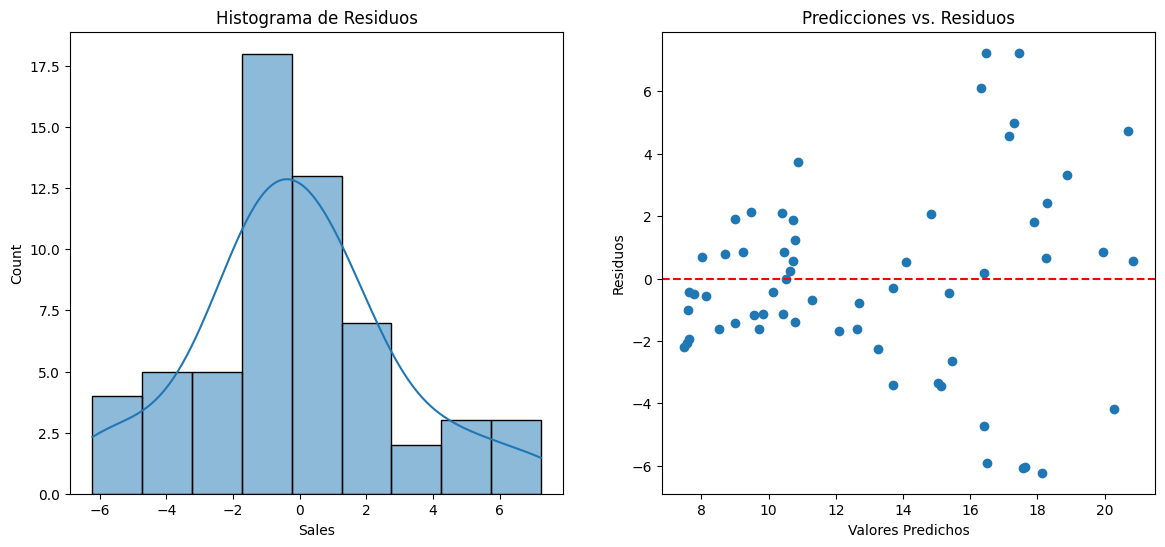

In [7]:
# 6. Calcular los residuos en el conjunto de prueba
residuos = y_test - model_simple.predict(X_test)

# Gráfico de Normalidad (Histograma)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True)
plt.title('Histograma de Residuos')

# Gráfico de Homocedasticidad
plt.subplot(1, 2, 2)
plt.scatter(model_simple.predict(X_test), residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Predicciones vs. Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()

### 🤔 **Preguntas para Discusión:**

1.  Interpreta el coeficiente $\theta_1$ (Coeficiente para TV). ¿Qué significa este número en el contexto del problema?
2.  Observando los gráficos de residuos: ¿Crees que se cumplen los supuestos de Normalidad y Homocedasticidad? ¿Por qué o por qué no?
3.  Si un nuevo producto tiene un presupuesto de 150 (mil USD) para TV, ¿cuántas ventas predeciría este modelo?

-----

respuestas aqui

## 4\. Regresión Lineal Múltiple 🏙️

¿Y si usamos toda la información que tenemos? Un modelo de regresión múltiple nos permite usar `TV`, `Radio` y `Newspaper` juntos para predecir las ventas.

**Modelo a estimar:** $Sales = \theta_0 + \theta_1 \times TV + \theta_2 \times Radio + \theta_3 \times Newspaper$


In [8]:
# 1. Definir X con todas las variables predictoras
X_multi = data[['TV', 'Radio', 'Newspaper']]
y_multi = data['Sales']

# 2. Dividir los datos
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)

# 3. Crear y entrenar el modelo
model_multiple = LinearRegression()
model_multiple.fit(X_train_m, y_train_m)

# 4. Ver los parámetros
print("Ordenada al origen (θ₀):", model_multiple.intercept_)
print("\nCoeficientes (θ₁, θ₂, θ₃):")
print(pd.DataFrame(model_multiple.coef_, X_multi.columns, columns=['Coeficiente']))

# 5. Evaluar el modelo
y_pred_m = model_multiple.predict(X_test_m)
r2_simple = r2_score(y_test, model_simple.predict(X_test))
r2_multiple = r2_score(y_test_m, y_pred_m)

print(f"\nR² del modelo simple: {r2_simple:.4f}")
print(f"R² del modelo múltiple: {r2_multiple:.4f}")

Ordenada al origen (θ₀): 2.7089490925159065

Coeficientes (θ₁, θ₂, θ₃):
           Coeficiente
TV            0.044059
Radio         0.199287
Newspaper     0.006882

R² del modelo simple: 0.6714
R² del modelo múltiple: 0.8609



### 🤔 **Preguntas para Discusión:**

1.  Compara el R² del modelo múltiple con el del modelo simple. ¿Qué nos dice este aumento sobre el poder predictivo del nuevo modelo?
2.  Observa el coeficiente de `Newspaper`. Es muy cercano a cero. ¿Qué sugiere esto sobre la contribución de la publicidad en periódicos cuando ya conocemos el gasto en TV y Radio?
3.  En el análisis inicial, `Newspaper` tenía una correlación positiva con `Sales`. ¿Por qué su coeficiente en el modelo múltiple es casi nulo? (Pista: multicolinealidad).


## 5\. Regresión Lineal Polinomial 🎢

¿Y si la relación no es una línea recta perfecta? Podemos crear un modelo más flexible añadiendo características polinomiales (como $TV^2$). Esto nos permite ajustar una curva a los datos, ¡pero sigue siendo un modelo "lineal" en sus parámetros\!

**Modelo a estimar (grado 2):** $Sales = \theta_0 + \theta_1 \times TV + \theta_2 \times TV^2$


R² del modelo simple (TV): 0.6714
R² del modelo polinomial (Grado 2 en TV): 0.6552


C:\Users\16079220\AppData\Local\anaconda3\envs\learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


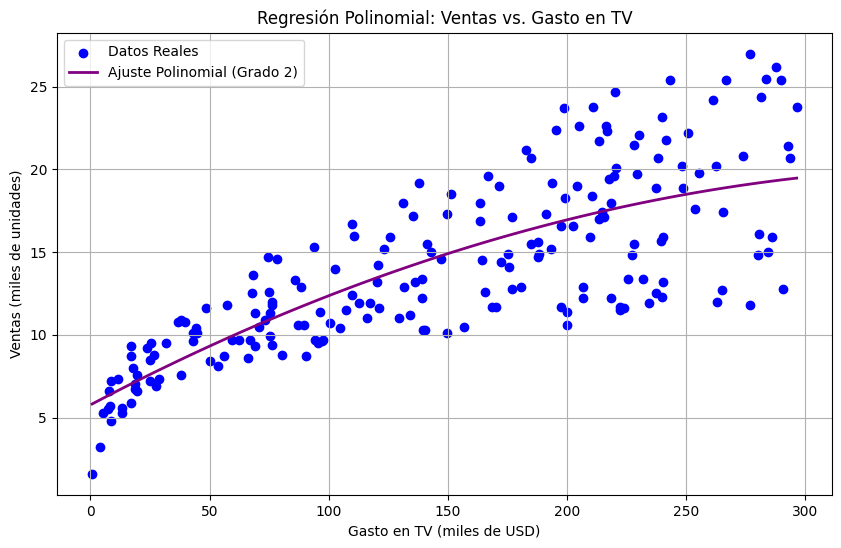

In [9]:
# Usaremos un Pipeline para simplificar los pasos de transformación y modelado
# Grado del polinomio
degree = 2

# 1. Crear el pipeline
# Paso 1: Generar características polinomiales (1, TV, TV^2)
# Paso 2: Ajustar un modelo lineal a esas características
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('lin_reg', LinearRegression())
])

# Usaremos las mismas variables X e y del modelo simple
pipeline.fit(X_train, y_train)

# 2. Evaluar el modelo
y_pred_poly = pipeline.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"R² del modelo simple (TV): {r2_simple:.4f}")
print(f"R² del modelo polinomial (Grado 2 en TV): {r2_poly:.4f}")

# 3. Visualizar el resultado
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = pipeline.predict(X_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.plot(X_range, y_range_pred, color='purple', linewidth=2, label=f'Ajuste Polinomial (Grado {degree})')
plt.title('Regresión Polinomial: Ventas vs. Gasto en TV')
plt.xlabel('Gasto en TV (miles de USD)')
plt.ylabel('Ventas (miles de unidades)')
plt.legend()
plt.grid(True)
plt.show()

### ☢️ **Peligro: ¡Sobreajuste (Overfitting)\!**

¿Qué pasa si usamos un grado de polinomio muy alto?


C:\Users\16079220\AppData\Local\anaconda3\envs\learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


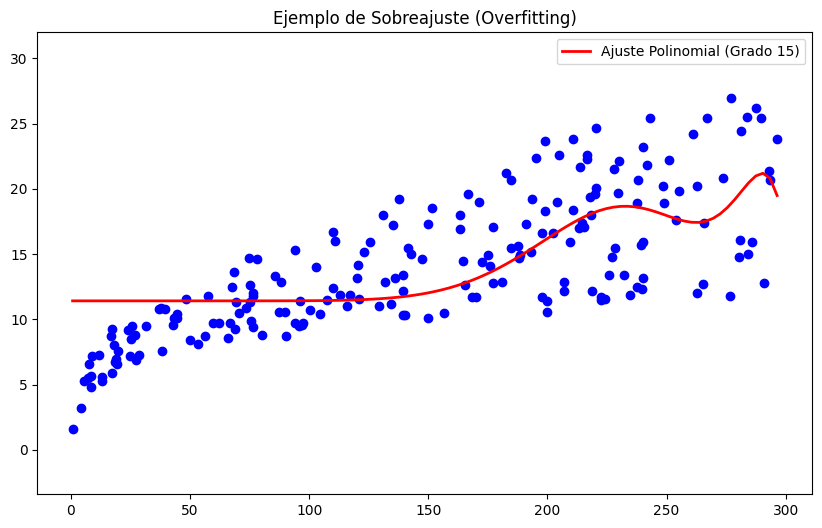

In [10]:
# Ajustemos un modelo de grado 15
degree_overfit = 15
pipeline_overfit = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree_overfit, include_bias=False)),
    ('lin_reg', LinearRegression())
])
pipeline_overfit.fit(X_train, y_train)

# Visualizar el sobreajuste
y_range_overfit = pipeline_overfit.predict(X_range)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X_range, y_range_overfit, color='red', linewidth=2, label=f'Ajuste Polinomial (Grado {degree_overfit})')
plt.title('Ejemplo de Sobreajuste (Overfitting)')
plt.ylim(y.min()-5, y.max()+5) # Ajustar el eje y para ver la curva
plt.legend()
plt.show()

### 🤔 **Preguntas para Discusión:**

1.  Al pasar de un modelo lineal simple a uno polinomial de grado 2, el R² mejoró ligeramente. ¿Qué nos dice esto sobre la naturaleza de la relación entre `TV` y `Sales`?
2.  Observa el gráfico del modelo de grado 15. Describe con tus propias palabras qué está haciendo el modelo y por qué sería terrible para predecir las ventas de un nuevo presupuesto de publicidad.
3.  El grado del polinomio es un parámetro que nosotros elegimos antes de entrenar (no lo aprende el modelo). ¿Cómo se llama este tipo de parámetro en Machine Learning?